# Modeling

In [193]:
train_df['experience'] = train_df['experience'].astype(str).astype(int)
train_df['city_development_index'] = train_df['city_development_index'].astype(str).astype(float)
train_df['training_hours'] = train_df['training_hours'].astype(str).astype(int)

In [194]:
list_of_columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 
                   'major_discipline', 'company_size', 'company_type', 'last_new_job']

train_dummies_df = []

for col in list_of_columns:
    dummy_train_df = pd.get_dummies(train_df[col])
    train_dummies_df.append(dummy_train_df)


list_of_columns.append('enrollee_id')    
train_dummies_df.insert(0, train_df.drop(columns=list_of_columns))

train_df = pd.concat(train_dummies_df,axis=1)

# Final look at our df
train_df.head(3)

,city_development_index,experience,training_hours,experience_over_20,experience_Unknown,target,Female,Male,Other,Has relevent experience,...,Public Sector,Pvt Ltd,Unknown,1,2,3,4,>4,Never,Unknown
0,0.762,9,70,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0.920,8,79,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
2,0.920,19,90,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0


In [195]:
columns_list = list(train_df.columns)
print(columns_list)

['city_development_index', 'experience', 'training_hours', 'experience_over_20', 'experience_Unknown', 'target', 'Female', 'Male', 'Other', 'Has relevent experience', 'No relevent experience', 'Full time course', 'No Enrollment', 'Part time course', 'Unknown', 'Graduate', 'High School', 'Masters', 'Phd', 'Primary School', 'Unknown', 'Arts', 'Business Degree', 'Humanities', 'No Major', 'Other', 'STEM', '10-49', '100-500', '1000-4999', '10000+', '50-99', '500-999', '5000-9999', '<10', 'Unknown', 'Early Stage Startup', 'Funded Startup', 'NGO', 'Other', 'Public Sector', 'Pvt Ltd', 'Unknown', '1', '2', '3', '4', '>4', 'Never', 'Unknown']


In [196]:
# Extra libs

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.svm import LinearSVC
#from imblearn.over_sampling import BorderlineSMOTE

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Modelling

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

ValueError: could not convert string to float: 'Male'

## LinearSVC

In [100]:
linearSCV = LinearSVC(dual=False, random_state=123, max_iter=10000)
linearSCV.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
linearSVC_prediction = linearSCV.predict(X_test_scaled)
cm_linearSVC = confusion_matrix(y_test, linearSVC_prediction)
df_linearSVC = pd.DataFrame(data=[f1_score(y_test, linearSVC_prediction), recall_score(y_test, linearSVC_prediction),
                   precision_score(y_test, linearSVC_prediction), accuracy_score(y_test, linearSVC_prediction), 
                   roc_auc_score(y_test, linearSVC_prediction)],
             columns=['LinearSVC Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_linearSVC

,LinearSVC Score
F1 Score,0.561637
Recall,0.727152
Precision,0.457500
Accuracy,0.720483
ROC AUC Score,0.722728


In [102]:
params_grid = {
    "C": [10 ** k for k in range(-3, 4)],
    "penalty": ['l2', 'l1'],
    # "tol": [1e-4, 1e-3, 1e-2]
}

# Initialize the GridSearchCV with LinearSVC
clf = GridSearchCV(linearSCV, params_grid, cv=5)
clf.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", clf.best_params_)

# Predictions and evaluation
linearSVC_t_prediction = clf.predict(X_test_scaled)
cm_linearSVC_t = confusion_matrix(y_test, linearSVC_t_prediction)
df_linearSVC_t = pd.DataFrame(data=[f1_score(y_test, linearSVC_t_prediction), recall_score(y_test, linearSVC_t_prediction),
                   precision_score(y_test, linearSVC_t_prediction), accuracy_score(y_test, linearSVC_t_prediction), 
                   roc_auc_score(y_test, linearSVC_t_prediction)],
             columns=['Tuned LinearSVC Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_linearSVC_t

Best Parameters:  {'C': 0.001, 'penalty': 'l2'}


,Tuned LinearSVC Score
F1 Score,0.561063
Recall,0.727152
Precision,0.456739
Accuracy,0.719830
ROC AUC Score,0.722295


## SVM

### sigmoid

In [103]:
SVC_sigmoid = SVC(kernel='sigmoid')
SVC_sigmoid.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
SVC_sigmoid_prediction = linearSCV.predict(X_test_scaled)
cm_SVC_sigmoid = confusion_matrix(y_test, SVC_sigmoid_prediction)
df_SVC_sigmoid = pd.DataFrame(data=[f1_score(y_test, SVC_sigmoid_prediction), recall_score(y_test, SVC_sigmoid_prediction),
                   precision_score(y_test, SVC_sigmoid_prediction), accuracy_score(y_test, SVC_sigmoid_prediction), 
                   roc_auc_score(y_test, SVC_sigmoid_prediction)],
             columns=['SVC Sigmoid Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_sigmoid

,SVC Sigmoid Kernel Score
F1 Score,0.561637
Recall,0.727152
Precision,0.457500
Accuracy,0.720483
ROC AUC Score,0.722728


In [107]:
params_grid = {
    'C': [10 ** k for k in range(-3, 4)],    
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize the GridSearchCV
clf = GridSearchCV(SVC_sigmoid, params_grid, cv=5)
clf.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", clf.best_params_)

# Predictions and evaluation
SVC_sigmoid_t_prediction = clf.predict(X_test_scaled)
cm_SVC_sigmoid_t = confusion_matrix(y_test, SVC_sigmoid_t_prediction)
df_SVC_sigmoid_t = pd.DataFrame(data=[f1_score(y_test, SVC_sigmoid_t_prediction), recall_score(y_test, SVC_sigmoid_t_prediction),
                   precision_score(y_test, SVC_sigmoid_t_prediction), accuracy_score(y_test, SVC_sigmoid_t_prediction), 
                   roc_auc_score(y_test, SVC_sigmoid_t_prediction)],
             columns=['Tuned SVC Sigmoid Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
cm_SVC_sigmoid_t

Best Parameters:  {'C': 1, 'gamma': 0.001}


array([[1585,  726],
       [ 171,  584]])

### Poly

In [108]:
SVC_poly = SVC(kernel='poly')
SVC_poly.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
SVC_poly_prediction = linearSCV.predict(X_test_scaled)
cm_SVC_poly = confusion_matrix(y_test, SVC_poly_prediction)
df_SVC_poly = pd.DataFrame(data=[f1_score(y_test, SVC_poly_prediction), recall_score(y_test, SVC_poly_prediction),
                   precision_score(y_test, SVC_poly_prediction), accuracy_score(y_test, SVC_poly_prediction), 
                   roc_auc_score(y_test, SVC_poly_prediction)],
             columns=['SVC Poly Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_poly

,SVC Poly Kernel Score
F1 Score,0.561637
Recall,0.727152
Precision,0.457500
Accuracy,0.720483
ROC AUC Score,0.722728


In [ ]:
params_grid = {
    'C': [10 ** k for k in range(-3, 4)],    
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize the GridSearchCV
clf = GridSearchCV(SVC_poly, params_grid, cv=5)
clf.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", clf.best_params_)

# Predictions and evaluation
SVC_poly_t_prediction = clf.predict(X_test_scaled)
cm_SVC_poly_t = confusion_matrix(y_test, SVC_poly_t_prediction)
df_SVC_poly_t = pd.DataFrame(data=[f1_score(y_test, SVC_poly_t_prediction), recall_score(y_test, SVC_poly_t_prediction),
                   precision_score(y_test, SVC_poly_t_prediction), accuracy_score(y_test, SVC_poly_t_prediction), 
                   roc_auc_score(y_test, SVC_poly_t_prediction)],
             columns=['Tuned SVC Poly Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_poly_t

### RBF

In [ ]:
SVC_rbf = SVC(kernel='rbf')
SVC_rbf.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
SVC_RBF_prediction = linearSCV.predict(X_test_scaled)
cm_SVC_RBF = confusion_matrix(y_test, SVC_RBF_prediction)
df_SVC_RBF = pd.DataFrame(data=[f1_score(y_test, SVC_RBF_prediction), recall_score(y_test, SVC_RBF_prediction),
                   precision_score(y_test, SVC_RBF_prediction), accuracy_score(y_test, SVC_RBF_prediction), 
                   roc_auc_score(y_test, SVC_RBF_prediction)],
             columns=['SVC RBF Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_RBF

In [ ]:
params_grid = {
    'C': [10 ** k for k in range(-3, 4)],    
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize the GridSearchCV
clf = GridSearchCV(SVC_rbf, params_grid, cv=5)
clf.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", clf.best_params_)

# Predictions and evaluation
SVC_RBF_t_prediction = clf.predict(X_test_scaled)
cm_SVC_RBF_t = confusion_matrix(y_test, SVC_RBF_t_prediction)
df_SVC_RBF_t = pd.DataFrame(data=[f1_score(y_test, SVC_RBF_t_prediction), recall_score(y_test, SVC_RBF_t_prediction),
                   precision_score(y_test, SVC_RBF_t_prediction), accuracy_score(y_test, SVC_RBF_t_prediction), 
                   roc_auc_score(y_test, SVC_RBF_t_prediction)],
             columns=['Tuned SVC RBF Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_RBF_t

### Linear

In [ ]:
SVC_linear = SVC(kernel='linear')
SVC_linear.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
SVC_linear_prediction = linearSCV.predict(X_test_scaled)
cm_SVC_linear = confusion_matrix(y_test, SVC_linear_prediction)
df_SVC_linear = pd.DataFrame(data=[f1_score(y_test, SVC_linear_prediction), recall_score(y_test, SVC_linear_prediction),
                   precision_score(y_test, SVC_linear_prediction), accuracy_score(y_test, SVC_linear_prediction), 
                   roc_auc_score(y_test, SVC_linear_prediction)],
             columns=['SVC Linear Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_linear

In [ ]:
params_grid = {
    'C': [10 ** k for k in range(-3, 4)],    
}

# Initialize the GridSearchCV
clf = GridSearchCV(SVC_linear, params_grid, cv=5)
clf.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", clf.best_params_)

# Predictions and evaluation
SVC_linear_t_prediction = clf.predict(X_test_scaled)
cm_SVC_linear_t = confusion_matrix(y_test, SVC_linear_t_prediction)
df_SVC_linear_t = pd.DataFrame(data=[f1_score(y_test, SVC_linear_t_prediction), recall_score(y_test, SVC_linear_t_prediction),
                   precision_score(y_test, SVC_linear_t_prediction), accuracy_score(y_test, SVC_linear_t_prediction), 
                   roc_auc_score(y_test, SVC_linear_t_prediction)],
             columns=['Tuned SVC RBF Kernel Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_SVC_linear_t

### Decision Tree

In [109]:
dtree = DecisionTreeClassifier(random_state=123)
dtree.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
dtree_prediction = linearSCV.predict(X_test_scaled)
cm_dtree = confusion_matrix(y_test, dtree_prediction)
df_dtree = pd.DataFrame(data=[f1_score(y_test, dtree_prediction), recall_score(y_test, dtree_prediction),
                   precision_score(y_test, dtree_prediction), accuracy_score(y_test, dtree_prediction), 
                   roc_auc_score(y_test, dtree_prediction)],
             columns=['Decision Tree Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_dtree

,Decision Tree Score
F1 Score,0.561637
Recall,0.727152
Precision,0.457500
Accuracy,0.720483
ROC AUC Score,0.722728


In [110]:
params_grid = {
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 10, 20, 50],
    # "min_samples_leaf": [1, 2, 5, 10],
    # "criterion": ['gini', 'entropy', 'log_loss']
}

# Initialize the GridSearchCV
clf = GridSearchCV(dtree, params_grid, cv=5)
clf.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", clf.best_params_)

# Predictions and evaluation
dtree_t_prediction = clf.predict(X_test_scaled)
cm_dtree_t = confusion_matrix(y_test, dtree_t_prediction)
df_dtree_t = pd.DataFrame(data=[f1_score(y_test, dtree_t_prediction), recall_score(y_test, dtree_t_prediction),
                   precision_score(y_test, dtree_t_prediction), accuracy_score(y_test, dtree_t_prediction), 
                   roc_auc_score(y_test, dtree_t_prediction)],
             columns=['Tuned Decision Tree Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_dtree_t

Best Parameters:  {'max_depth': 10, 'min_samples_split': 2}


,Tuned Decision Tree Score
F1 Score,0.574661
Recall,0.672848
Precision,0.501481
Accuracy,0.754729
ROC AUC Score,0.727164


### Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
rfc_prediction = rfc.predict(X_test_scaled)
cm_rfc = confusion_matrix(y_test, rfc_prediction)
df_rfc = pd.DataFrame(data=[f1_score(y_test, rfc_prediction), recall_score(y_test, rfc_prediction),
                   precision_score(y_test, rfc_prediction), accuracy_score(y_test, rfc_prediction), 
                   roc_auc_score(y_test, rfc_prediction)],
             columns=['Random Forest Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_dtree

In [ ]:
params_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
#    'min_samples_split': [2, 5, 10, 20],
#    'max_features': ['auto', 'sqrt', 'log2', None],
}

# Initialize the GridSearchCV
clf = GridSearchCV(rfc, params_grid, cv=5)
clf.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", clf.best_params_)

# Predictions and evaluation
rfc_t_prediction = clf.predict(X_test_scaled)
cm_rfc_t = confusion_matrix(y_test, rfc_t_prediction)
df_rfc_t = pd.DataFrame(data=[f1_score(y_test, rfc_t_prediction), recall_score(y_test, rfc_t_prediction),
                   precision_score(y_test, rfc_t_prediction), accuracy_score(y_test, rfc_t_prediction), 
                   roc_auc_score(y_test, rfc_t_prediction)],
             columns=['Tuned Random Forest Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_rfc_t

random_state=0, n_estimators= 800, criterion = 'gini',max_features = 'sqrt',max_depth = 8

### Logistic Regression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train_resampled, y_train_resampled)

# 예측 및 평가
log_prediction = logistic.predict(X_test_scaled)
cm_log = confusion_matrix(y_test, log_prediction)
df_log = pd.DataFrame(data=[f1_score(y_test, log_prediction), recall_score(y_test, log_prediction),
                   precision_score(y_test, log_prediction), accuracy_score(y_test, log_prediction), 
                   roc_auc_score(y_test, log_prediction)],
             columns=['Logistic Regression Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_log

/Users/juwonjung/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
params_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    # 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

# Initialize the GridSearchCV
clf = GridSearchCV(rfc, params_grid, cv=5)
clf.fit(X_train_resampled, y_train_resampled)

# Output the best parameters
print("Best Parameters: ", clf.best_params_)

# Predictions and evaluation
rfc_t_prediction = clf.predict(X_test_scaled)
cm_rfc_t = confusion_matrix(y_test, rfc_t_prediction)
df_rfc_t = pd.DataFrame(data=[f1_score(y_test, rfc_t_prediction), recall_score(y_test, rfc_t_prediction),
                   precision_score(y_test, rfc_t_prediction), accuracy_score(y_test, rfc_t_prediction), 
                   roc_auc_score(y_test, rfc_t_prediction)],
             columns=['Tuned Random Forest Score'],
             index=["F1 Score", "Recall", "Precision", "Accuracy", "ROC AUC Score"])
df_rfc_t

### KNN

In [ ]:
# K-Nearest Neighbours (KNN)
# searched already to find optimal neighbours, removed from notebook as took a long time
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
knn_prediction = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, knn_prediction)
knn_df = pd.DataFrame(data=[accuracy_score(y_test, knn_prediction), recall_score(y_test, knn_prediction),
                   precision_score(y_test, knn_prediction), roc_auc_score(y_test, knn_prediction)], 
             columns=['KNN Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

### XGBoost

### AdaBoost

### Naive Bayes

# So far

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_21491/2335527059.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = ax0.add_patch(Rectangle((0, 2), 5, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))


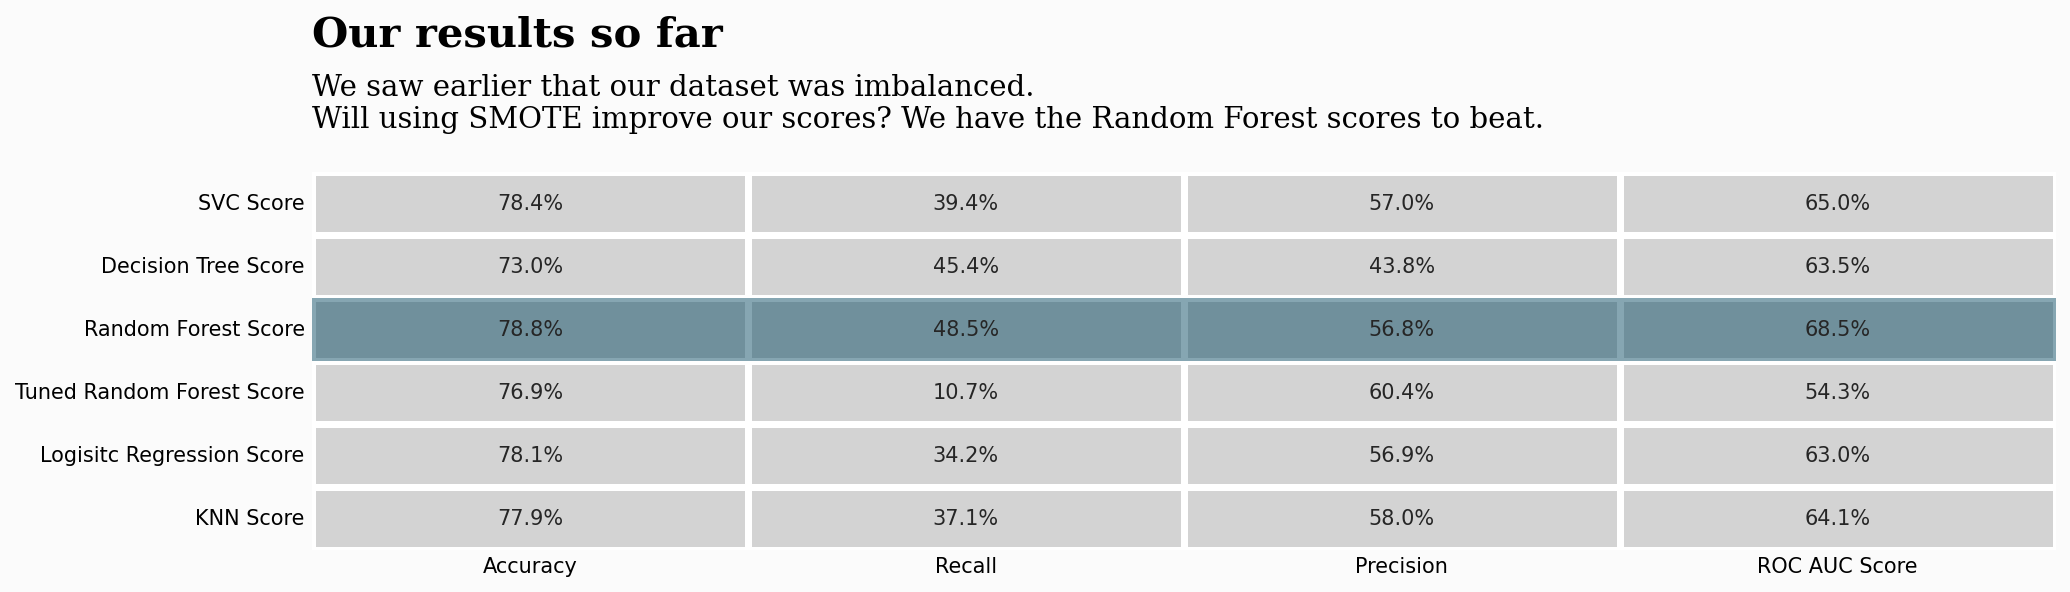

In [ ]:
fig = plt.figure(figsize=(15,18), dpi=150)
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ["lightgray","lightgray"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)

# Overall
df_models = round(pd.concat([svc_df,dtree_df,rfc_df,trfc_df,log_df,knn_df], axis=1),3)
sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%", linewidths=2.5,cbar=False,ax=ax0)

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.text(0,-2,'Our results so far',fontfamily='serif',fontsize=20,fontweight='bold')
ax0.text(0,-0.7,'We saw earlier that our dataset was imbalanced.\nWill using SMOTE improve our scores? We have the Random Forest scores to beat.',fontfamily='serif',fontsize=14)

from matplotlib.patches import Rectangle

rect = ax0.add_patch(Rectangle((0, 2), 5, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))



plt.show()

# Implementing SMOTE

In [ ]:
# Our data is unbalanced, we can fix this with SMOTE

from imblearn.over_sampling import SMOTE

X = aug_train.dropna().drop(columns=['target']).values
y = aug_train.dropna()['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [ ]:
# Scale our data in pipeline

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

In [ ]:
#rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
#svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
#logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

In [ ]:
print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
# removed svm as took an incredibly long time to fit
#print('SVM mean :',cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : 0.8296410644464631
Logistic Regression mean : 0.7923274865043121


# Let's try the test data

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

rf_pipeline.fit(X_train_resh,y_train_resh)
#svm_pipeline.fit(X_train_resh,y_train_resh)
logreg_pipeline.fit(X_train_resh,y_train_resh)

rf_pred   =rf_pipeline.predict(X_test)
#svm_pred  = svm_pipeline.predict(X_test)
logreg_pred   = logreg_pipeline.predict(X_test)

rf_cm  = confusion_matrix(y_test,rf_pred )
#svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )

rf_f1  = f1_score(y_test,rf_pred)
#svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)

In [ ]:
print('Mean scores:')
print('RF F1 score:',rf_f1)
print('RF Accuracy:',accuracy_score(y_test,rf_pred))
print('LR F1 score :',logreg_f1)
print('LR Accuracy:',accuracy_score(y_test,logreg_pred))

Mean scores:
RF F1 score: 0.5285016286644951
RF Accuracy: 0.7857539315448658
LR F1 score : 0.6056382641748496
LR Accuracy: 0.7696577243293247


In [ ]:
smote_rf_df = pd.DataFrame(data=[accuracy_score(y_test, rf_pred), recall_score(y_test, rf_pred),
                   precision_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)], 
             columns=['SMOTE Random Forest Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

smote_logreg_df = pd.DataFrame(data=[accuracy_score(y_test, logreg_pred), recall_score(y_test, logreg_pred),
                   precision_score(y_test, logreg_pred), roc_auc_score(y_test, logreg_pred)], 
             columns=['SMOTE Logistic Regression Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])


smote_cm_log = confusion_matrix(y_test, logreg_pred)
smote_cm_rf = confusion_matrix(y_test, rf_pred)

# Viewing our results in an accesible way¶
We now now need to find a way to view our results which can be easily explained to business stakeholders.

A simple annotated heatmap works well for this!

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_21491/1418853736.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = ax0.add_patch(Rectangle((0, 6), 5, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))
/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_21491/1418853736.py:118: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax8.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))


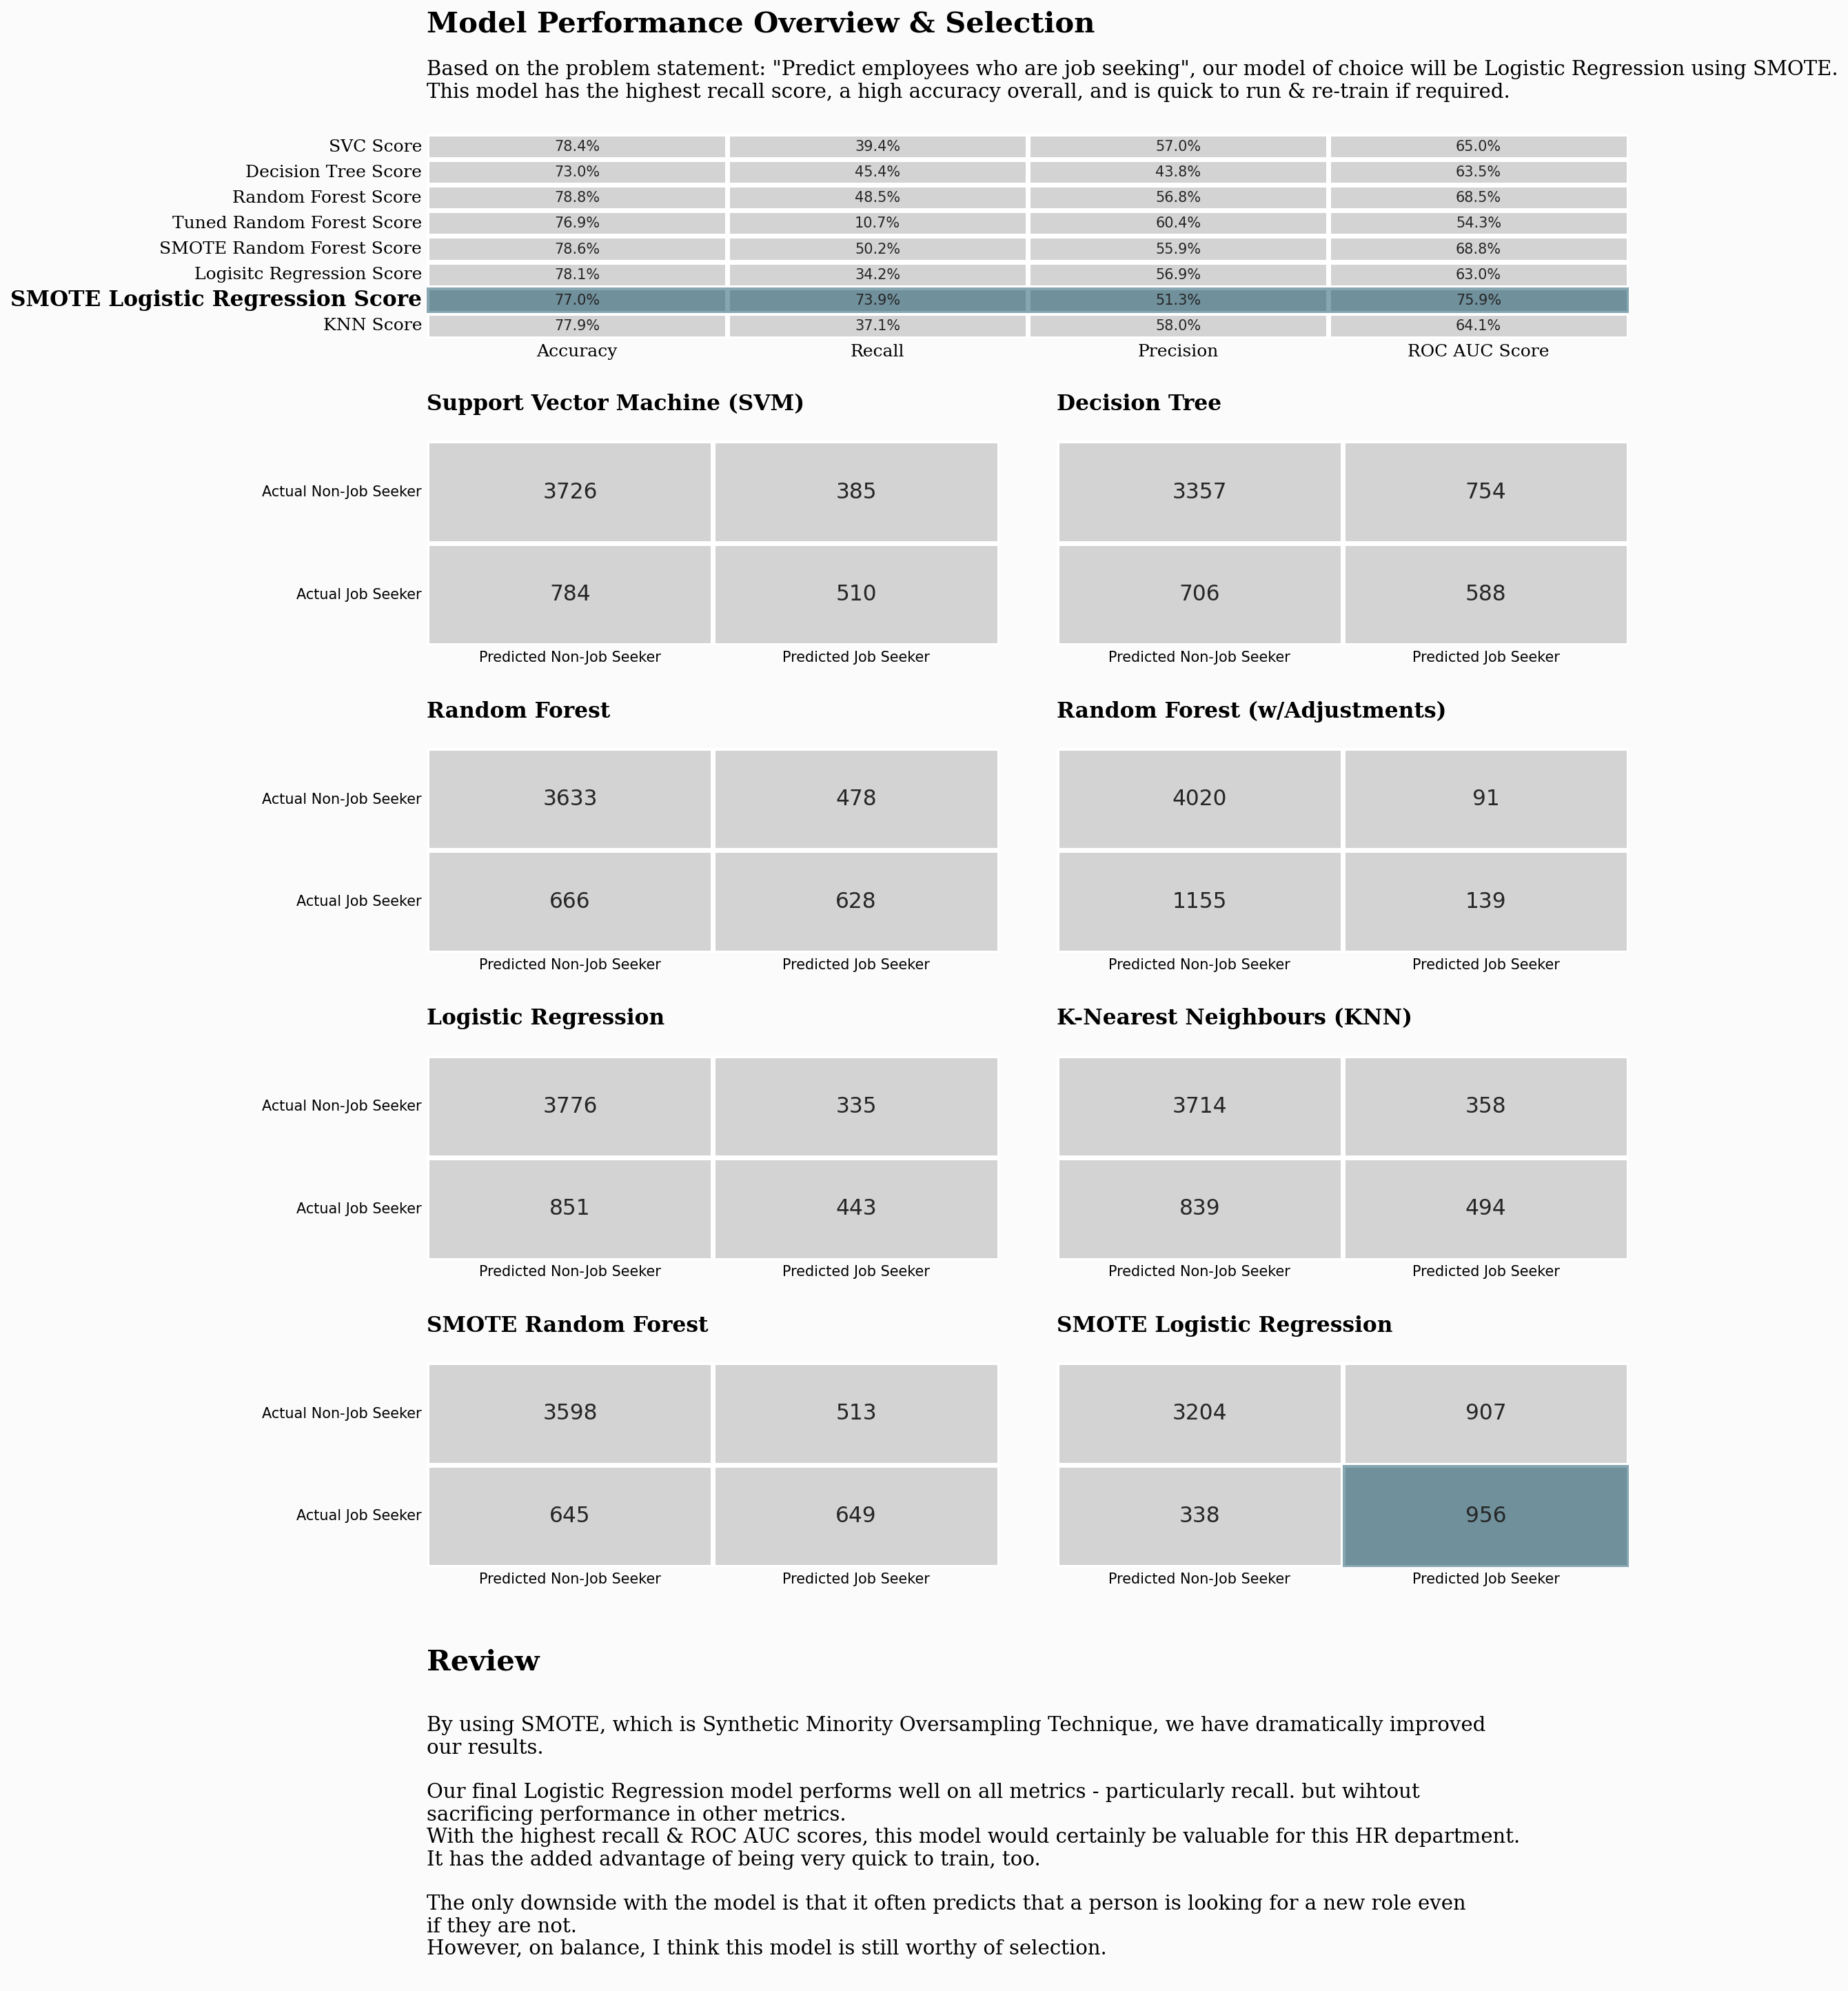

In [ ]:
# Plotting our results

colors = ["lightgray","lightgray"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(15,18), dpi=150) # create figure
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[3, 0])
ax6 = fig.add_subplot(gs[3,1])
ax7 = fig.add_subplot(gs[4,0])
ax8 = fig.add_subplot(gs[4,1])

# Overall
df_models = round(pd.concat([svc_df,dtree_df,rfc_df,trfc_df,smote_rf_df,log_df,smote_logreg_df,knn_df], axis=1),3)
sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%", linewidths=2.5,cbar=False,ax=ax0)


ax0.set_yticklabels(ax0.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=12)
ax0.set_xticklabels(ax0.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=12)

ax0.text(0,-4,'Model Performance Overview & Selection',fontfamily='serif',fontsize=20,fontweight='bold')
ax0.text(0,-0.55,
         '''
Based on the problem statement: "Predict employees who are job seeking", our model of choice will be Logistic Regression using SMOTE.
This model has the highest recall score, a high accuracy overall, and is quick to run & re-train if required.
'''
         ,fontfamily='serif',fontsize=14)



for lab, annot in zip(ax0.get_yticklabels(), ax0.texts):
    text =  lab.get_text()
    if text == 'SMOTE Logistic Regression Score': 
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(15)
        lab.set_color('black')
        



from matplotlib.patches import Rectangle

rect = ax0.add_patch(Rectangle((0, 6), 5, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))



# svc
sns.heatmap(cm_svc, linewidths=2.5,yticklabels=['Actual Non-Job Seeker','Actual Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax1,annot_kws={"fontsize":15})

# dtree
sns.heatmap(cm_dtree, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax2,annot_kws={"fontsize":15})

# rf
sns.heatmap(cm_rfc, linewidths=2.5,yticklabels=['Actual Non-Job Seeker','Actual Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax3,annot_kws={"fontsize":15})

# tuned rf
sns.heatmap(cm_trfc, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax4,annot_kws={"fontsize":15})

# log
sns.heatmap(cm_log, linewidths=2.5,yticklabels=['Actual Non-Job Seeker','Actual Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax5,annot_kws={"fontsize":15})

# knn
sns.heatmap(cm_knn, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax6,annot_kws={"fontsize":15})

# smote rf
sns.heatmap(smote_cm_rf, linewidths=2.5,yticklabels=['Actual Non-Job Seeker','Actual Job Seeker'],xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax7,annot_kws={"fontsize":15})

# smote log reg
sns.heatmap(smote_cm_log, linewidths=2.5,yticklabels=False,xticklabels=['Predicted Non-Job Seeker','Predicted Job Seeker'], cmap=colormap, cbar=None,annot=True,fmt='d',ax=ax8,annot_kws={"fontsize":15})



background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) 

ax0.set_xlabel("")
ax0.set_ylabel("")


ax1.text(0, -0.3, 'Support Vector Machine (SVM)',fontsize=15, fontweight='bold', fontfamily='serif')
ax2.text(0, -0.3, 'Decision Tree', fontsize=15, fontweight='bold', fontfamily='serif')
ax3.text(0, -0.3, 'Random Forest',fontsize=15, fontweight='bold', fontfamily='serif')
ax4.text(0, -0.3, 'Random Forest (w/Adjustments)', fontsize=15, fontweight='bold', fontfamily='serif')
ax5.text(0, -0.3, 'Logistic Regression',fontsize=15, fontweight='bold', fontfamily='serif')
ax6.text(0, -0.3, 'K-Nearest Neighbours (KNN)', fontsize=15, fontweight='bold', fontfamily='serif')
ax7.text(0, -0.3, 'SMOTE Random Forest',fontsize=15, fontweight='bold', fontfamily='serif')
ax8.text(0, -0.3, 'SMOTE Logistic Regression', fontsize=15, fontweight='bold', fontfamily='serif')


ax7.text(0, 3, 'Review',fontsize=20, fontweight='bold', fontfamily='serif')
ax7.text(0, 6, 
'''
By using SMOTE, which is Synthetic Minority Oversampling Technique, we have dramatically improved
our results.

Our final Logistic Regression model performs well on all metrics - particularly recall. but wihtout
sacrificing performance in other metrics.
With the highest recall & ROC AUC scores, this model would certainly be valuable for this HR department.
It has the added advantage of being very quick to train, too.

The only downside with the model is that it often predicts that a person is looking for a new role even
if they are not. 
However, on balance, I think this model is still worthy of selection. 
''',fontsize=14, fontfamily='serif')


from matplotlib.patches import Rectangle


ax8.add_patch(Rectangle((1, 1), 1, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))

colors = ['gray','#0e4f66','#002d1d']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

for i in range(0,9):
    locals()["ax"+str(i)].set_facecolor(background_color) 
    
for i in range(0,9):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)


for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

- 코드 수정한 결과 SMOTE RF, SMOTE Logistic regression 결과랑 KNN 결과, RF, DT 가 다르게 나온다.

# Something else... Borderline SMOTE
There are many oversampling techniques that one could employ.

A variation of the technique used above is Borderline SMOTE.

Borderline SMOTE involves selecting those instances of the minority class that are misclassified.

We can then oversample just those difficult instances, providing more resolution only where it may be required

A great article cab be found here:

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

## 이 부분도 있긴 한데, import 오류 나서,,, 실행은 안 할게요!! 그래도 우리가 찾은 코드들은 다 돌아갑니다.!!